In [1]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates

from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('D:/c-j-l-j-l-cc-1/datasets/000001xin.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.050,99.980,95.790,99.980,126000.00,4.940000e+05
1990-12-20,99.98,104.300,104.390,99.980,104.390,19700.00,8.400000e+04
1990-12-21,104.39,109.070,109.130,103.730,109.130,2800.00,1.600000e+04
1990-12-24,109.13,113.570,114.550,109.130,114.550,3200.00,3.100000e+04
1990-12-25,114.55,120.090,120.250,114.550,120.250,1500.00,6.000000e+03
...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07


In [3]:
data_new = data['1995-01':'2024-09'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
# 计算000001上证指数日收益率 两种：
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return
Day,,,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,23451800.00,1.806930e+08,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,42222000.00,3.069230e+08,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,43012300.00,3.015330e+08,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,48748200.00,3.537580e+08,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,50985100.00,3.985190e+08,-0.023035
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


In [5]:
Month_data = data_new.resample('M')['Raw_return'].apply(lambda x: (1+x).prod() - 1).to_frame()
Month_data.reset_index(inplace = True)
Month_data.rename(columns = {'Day':'month'}, inplace = True)
Month_data.set_index('month', inplace = True)
Month_data

,Raw_return
month,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [8]:
inflation = pd.read_csv('D:/c-j-l-j-l-cc-1/datasets/inflation.csv')
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation.sort_values(by=['month'],axis=0,ascending=True)

,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2023-03-31,0.7
2023-04-30,0.1
2023-05-31,0.2


In [9]:
market_varince = data_new.resample('M').apply(
    {
        'Raw_return': lambda x: sum(x**2)
    }
)
market_varince.reset_index(inplace = True)
market_varince.rename(columns = {'Day':'month','Raw_return':'RV'}, inplace = True)
market_varince.set_index('month', inplace = True)
market_varince

,RV
month,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2024-05-31,0.000915
2024-06-30,0.000642
2024-07-31,0.001441


In [10]:
reg_data = pd.merge(Month_data, inflation, left_index=True, right_index=True, how='inner')
reg_data = pd.merge(reg_data, market_varince, left_index=True, right_index=True, how='inner')
reg_data

,Raw_return,cpi,RV
month,,,
1995-01-31,-0.131631,24.1,0.005695
1995-02-28,-0.023694,22.4,0.018086
1995-03-31,0.177803,21.3,0.013378
1995-04-30,-0.103552,20.7,0.008281
1995-05-31,0.207922,20.3,0.148387
...,...,...,...
2023-03-31,-0.002057,0.7,0.001098
2023-04-30,0.015404,0.1,0.001052
2023-05-31,-0.035721,0.2,0.001487


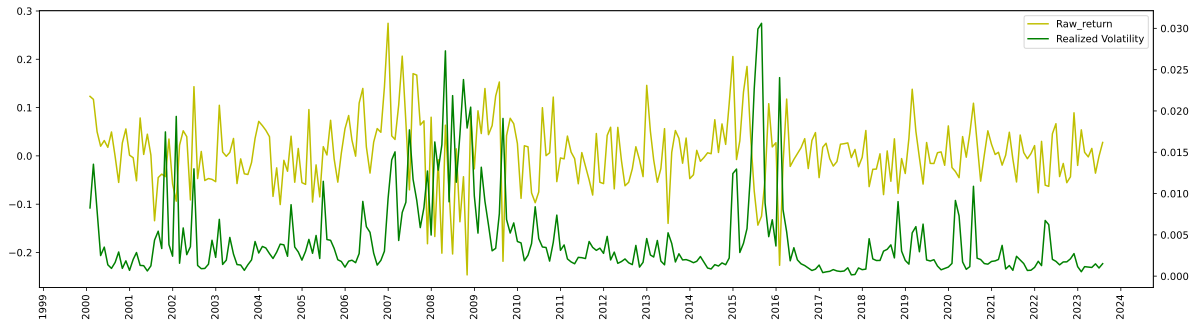

In [21]:
reg_data_plot = reg_data['2000':].copy()

fig, ax1 = plt.subplots(figsize=(20,5))
ax1.plot(reg_data_plot['Raw_return'], 
         '-y',
         label='Raw_return')

data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(reg_data_plot['RV'], 
         '-g',
         label='Realized Volatility')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.show();

In [12]:
reg_data['RV'].describe().round(4)

count    343.0000
mean       0.0056
std        0.0099
min        0.0002
25%        0.0016
50%        0.0029
75%        0.0062
max        0.1484
Name: RV, dtype: float64

In [13]:
reg_data['RV'].skew().round(4)
reg_data['RV'].kurt().round(4)

9.584

129.7683

In [14]:
# OLS regression
reg_data['lRV'] = reg_data['RV'].shift(1)
reg_data['lcpi'] = reg_data['cpi'].shift(2)

model = smf.ols('Raw_return ~ lRV', data = reg_data['2000':]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.848
Date:                Wed, 11 Dec 2024   Prob (F-statistic):             0.0926
Time:                        06:26:07   Log-Likelihood:                 347.37
No. Observations:                 283   AIC:                            -690.7
Df Residuals:                     281   BIC:                            -683.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0119      0.006      2.119      0.0

In [15]:
model2 = smf.ols('Raw_return ~ lcpi', data = reg_data['2000':]).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     13.50
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           0.000286
Time:                        06:26:23   Log-Likelihood:                 352.58
No. Observations:                 283   AIC:                            -701.2
Df Residuals:                     281   BIC:                            -693.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0226      0.006      3.642      0.0

In [16]:
model = smf.ols('Raw_return ~ lRV + lcpi', data = reg_data['2000':]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     7.194
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           0.000898
Time:                        06:26:40   Log-Likelihood:                 353.04
No. Observations:                 283   AIC:                            -700.1
Df Residuals:                     280   BIC:                            -689.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0251      0.007      3.720      0.0

In [17]:
model_fore_RV = smf.ols('RV ~ lRV', data = reg_data['2000':]).fit()
print(model_fore_RV.summary())

                            OLS Regression Results                            
Dep. Variable:                     RV   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     163.4
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           8.45e-30
Time:                        06:26:59   Log-Likelihood:                 1151.8
No. Observations:                 283   AIC:                            -2300.
Df Residuals:                     281   BIC:                            -2292.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0018      0.000      5.429      0.0

In [18]:
reg_data_new = reg_data['2000':].copy()
reg_data_new['RV_fore'] = model_fore_RV.fittedvalues
reg_data_new

,Raw_return,cpi,RV,lRV,lcpi,RV_fore
month,,,,,,
2000-01-31,0.123242,-0.2,0.008258,0.001771,-0.9,0.002844
2000-02-29,0.116990,0.7,0.013547,0.008258,-1.0,0.006778
2000-03-31,0.049948,-0.2,0.007877,0.013547,-0.2,0.009985
2000-04-30,0.020053,-0.3,0.002494,0.007877,0.7,0.006547
2000-05-31,0.031710,0.1,0.003515,0.002494,-0.2,0.003282
...,...,...,...,...,...,...
2023-03-31,-0.002057,0.7,0.001098,0.001152,2.1,0.002469
2023-04-30,0.015404,0.1,0.001052,0.001098,1.0,0.002436
2023-05-31,-0.035721,0.2,0.001487,0.001052,0.7,0.002408


In [19]:
reg_data_new = reg_data['2000':].copy()
reg_data_new['RV_fore'] = model_fore_RV.fittedvalues
reg_data_new

,Raw_return,cpi,RV,lRV,lcpi,RV_fore
month,,,,,,
2000-01-31,0.123242,-0.2,0.008258,0.001771,-0.9,0.002844
2000-02-29,0.116990,0.7,0.013547,0.008258,-1.0,0.006778
2000-03-31,0.049948,-0.2,0.007877,0.013547,-0.2,0.009985
2000-04-30,0.020053,-0.3,0.002494,0.007877,0.7,0.006547
2000-05-31,0.031710,0.1,0.003515,0.002494,-0.2,0.003282
...,...,...,...,...,...,...
2023-03-31,-0.002057,0.7,0.001098,0.001152,2.1,0.002469
2023-04-30,0.015404,0.1,0.001052,0.001098,1.0,0.002436
2023-05-31,-0.035721,0.2,0.001487,0.001052,0.7,0.002408
